In [2]:
from neuron import h, gui   # Standard "import" of the NEURON library into Python...
import matplotlib.pyplot as plt
import statistics 
import numpy as np
h.load_file('stdrun.hoc')   # Activation of a NEURON library, to fine control the simulation...

1.0

### Cell definition

R_a= cytoplasmic resistance.

diam= cell diameter􏱉􏰼􏱊􏱀􏱊􏱋􏰸􏱅􏰺􏰼􏰝􏰸􏱊􏱄􏱀􏰺􏱉.

nseg= number of nodes.

L=?

Cm= membrane capacitance.


dendriti= sistema di ricezione segnale da altri neurone (conduzione centripeta)

assone= sistema di trasmissione del segnale (conduzione centrifuga)

In [3]:
soma = h.Section(name='soma')
soma.cm = 0.5
h.psection()

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=0.5}
}


1.0

In [5]:
dend = h.Section(name='dend')
dend.Ra=10.6
dend.connect(soma(1))
h.psection(sec=dend)
#h.psection()

dend { nseg=1  L=100  Ra=10.6
	soma connect dend (0), 1
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=1}
}


1.0

In [4]:
axon=h.Section(name='axon')
axon.connect(soma, 0.1, 1)

axon

In [5]:
# print the topology
h.topology()


|-|       soma(0-1)
  `|       axon(1-0)



1.0

### Train impulse definition

In [40]:
tot=80000
freq=25          #ms -   Inter-stimulation interval
n=int(tot/freq)
A= 20.9  # micro Ampere, the intensity of the current square pulse

iclamp=[]   # impulse train
t_in=[]
counter=0

for i in range(0,n):
    imp=h.IClamp(soma(0.5))    # This is positioned in the central point (0.5) of the soma "segment"
    #imp=h.IClamp(dend(1))
    imp.delay=0+counter        # millisecond of delay, before switching on the current "square pulse"
    imp.amp=A
    #imp.dur=0.27303           # millisecond of duration, of the square pulse waveform
    imp.dur=0.2503           # millisecond of duration, of the square pulse waveform
    iclamp.append(imp)   # This is positioned in the central point (0.5) of the soma "segment"
    t_in.append(imp.delay)
    counter=imp.delay+freq

###  Model injection and record parameter

In [41]:
h.dt=0.01
soma.insert('hhCN')  # This inserts two voltage-dependent conductances (Na, K) into the simulated membrane
h.psection(sec=soma)
v_vec = h.Vector()             # Membrane potential vector is created here
t_vec = h.Vector()             # Time stamp vector is created here
m_vec = h.Vector()             # Open Na gate variable vector is created here
h_vec = h.Vector()             # Inactivation gate variable vector is created here
n_vec = h.Vector()             # Open K gate variable vector is created here
m_vec.record(soma(0.5).hhCN._ref_m) # The appropriate state-variable is linked to the vector
h_vec.record(soma(0.5).hhCN._ref_h) # The appropriate state-variable is linked to the vector
n_vec.record(soma(0.5).hhCN._ref_n) # The appropriate state-variable is linked to the vector
v_vec.record(soma(0.5)._ref_v) # The voltage of the soma section is linked to the vector v_vec
t_vec.record(h._ref_t)         # The absolute time of the simulation is linked to the vector t_vec

h.v_init = -60                # Let's set the initial condition of the membrane potential

h.t     =   0.0               # Let's reset the initial time of the simulation to 0 ms
h.tstop = float(tot)                # Let's set the stop time of the simulation to 40 ms

soma { nseg=1  L=100  Ra=35.4
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=0.5}
	insert IClamp { del=0 dur=0.2503 amp=20.9}
	insert IClamp { del=25 dur=0.2503 amp=20.9}
	insert IClamp { del=50 dur=0.2503 amp=20.9}
	insert IClamp { del=75 dur=0.2503 amp=20.9}
	insert IClamp { del=100 dur=0.2503 amp=20.9}
	insert IClamp { del=125 dur=0.2503 amp=20.9}
	insert IClamp { del=150 dur=0.2503 amp=20.9}
	insert IClamp { del=175 dur=0.2503 amp=20.9}
	insert IClamp { del=200 dur=0.2503 amp=20.9}
	insert IClamp { del=225 dur=0.2503 amp=20.9}
	insert IClamp { del=250 dur=0.2503 amp=20.9}
	insert IClamp { del=275 dur=0.2503 amp=20.9}
	insert IClamp { del=300 dur=0.2503 amp=20.9}
	insert IClamp { del=325 dur=0.2503 amp=20.9}
	insert IClamp { del=350 dur=0.2503 amp=20.9}
	insert IClamp { del=375 dur=0.2503 amp=20.9}
	insert IClamp { del=400 dur=0.2503 amp=20.9}
	insert IClamp { del=425 dur=0.2503 amp=20.9}
	insert IClamp { del=450 

	insert IClamp { del=15550 dur=0.2503 amp=20.9}
	insert IClamp { del=15575 dur=0.2503 amp=20.9}
	insert IClamp { del=15600 dur=0.2503 amp=20.9}
	insert IClamp { del=15625 dur=0.2503 amp=20.9}
	insert IClamp { del=15650 dur=0.2503 amp=20.9}
	insert IClamp { del=15675 dur=0.2503 amp=20.9}
	insert IClamp { del=15700 dur=0.2503 amp=20.9}
	insert IClamp { del=15725 dur=0.2503 amp=20.9}
	insert IClamp { del=15750 dur=0.2503 amp=20.9}
	insert IClamp { del=15775 dur=0.2503 amp=20.9}
	insert IClamp { del=15800 dur=0.2503 amp=20.9}
	insert IClamp { del=15825 dur=0.2503 amp=20.9}
	insert IClamp { del=15850 dur=0.2503 amp=20.9}
	insert IClamp { del=15875 dur=0.2503 amp=20.9}
	insert IClamp { del=15900 dur=0.2503 amp=20.9}
	insert IClamp { del=15925 dur=0.2503 amp=20.9}
	insert IClamp { del=15950 dur=0.2503 amp=20.9}
	insert IClamp { del=15975 dur=0.2503 amp=20.9}
	insert IClamp { del=16000 dur=0.2503 amp=20.9}
	insert IClamp { del=16025 dur=0.2503 amp=20.9}
	insert IClamp { del=16050 dur=0.2503 am

	insert IClamp { del=25550 dur=0.2503 amp=20.9}
	insert IClamp { del=25575 dur=0.2503 amp=20.9}
	insert IClamp { del=25600 dur=0.2503 amp=20.9}
	insert IClamp { del=25625 dur=0.2503 amp=20.9}
	insert IClamp { del=25650 dur=0.2503 amp=20.9}
	insert IClamp { del=25675 dur=0.2503 amp=20.9}
	insert IClamp { del=25700 dur=0.2503 amp=20.9}
	insert IClamp { del=25725 dur=0.2503 amp=20.9}
	insert IClamp { del=25750 dur=0.2503 amp=20.9}
	insert IClamp { del=25775 dur=0.2503 amp=20.9}
	insert IClamp { del=25800 dur=0.2503 amp=20.9}
	insert IClamp { del=25825 dur=0.2503 amp=20.9}
	insert IClamp { del=25850 dur=0.2503 amp=20.9}
	insert IClamp { del=25875 dur=0.2503 amp=20.9}
	insert IClamp { del=25900 dur=0.2503 amp=20.9}
	insert IClamp { del=25925 dur=0.2503 amp=20.9}
	insert IClamp { del=25950 dur=0.2503 amp=20.9}
	insert IClamp { del=25975 dur=0.2503 amp=20.9}
	insert IClamp { del=26000 dur=0.2503 amp=20.9}
	insert IClamp { del=26025 dur=0.2503 amp=20.9}
	insert IClamp { del=26050 dur=0.2503 am

	insert IClamp { del=35550 dur=0.2503 amp=20.9}
	insert IClamp { del=35575 dur=0.2503 amp=20.9}
	insert IClamp { del=35600 dur=0.2503 amp=20.9}
	insert IClamp { del=35625 dur=0.2503 amp=20.9}
	insert IClamp { del=35650 dur=0.2503 amp=20.9}
	insert IClamp { del=35675 dur=0.2503 amp=20.9}
	insert IClamp { del=35700 dur=0.2503 amp=20.9}
	insert IClamp { del=35725 dur=0.2503 amp=20.9}
	insert IClamp { del=35750 dur=0.2503 amp=20.9}
	insert IClamp { del=35775 dur=0.2503 amp=20.9}
	insert IClamp { del=35800 dur=0.2503 amp=20.9}
	insert IClamp { del=35825 dur=0.2503 amp=20.9}
	insert IClamp { del=35850 dur=0.2503 amp=20.9}
	insert IClamp { del=35875 dur=0.2503 amp=20.9}
	insert IClamp { del=35900 dur=0.2503 amp=20.9}
	insert IClamp { del=35925 dur=0.2503 amp=20.9}
	insert IClamp { del=35950 dur=0.2503 amp=20.9}
	insert IClamp { del=35975 dur=0.2503 amp=20.9}
	insert IClamp { del=36000 dur=0.2503 amp=20.9}
	insert IClamp { del=36025 dur=0.2503 amp=20.9}
	insert IClamp { del=36050 dur=0.2503 am

	insert IClamp { del=50550 dur=0.2503 amp=20.9}
	insert IClamp { del=50575 dur=0.2503 amp=20.9}
	insert IClamp { del=50600 dur=0.2503 amp=20.9}
	insert IClamp { del=50625 dur=0.2503 amp=20.9}
	insert IClamp { del=50650 dur=0.2503 amp=20.9}
	insert IClamp { del=50675 dur=0.2503 amp=20.9}
	insert IClamp { del=50700 dur=0.2503 amp=20.9}
	insert IClamp { del=50725 dur=0.2503 amp=20.9}
	insert IClamp { del=50750 dur=0.2503 amp=20.9}
	insert IClamp { del=50775 dur=0.2503 amp=20.9}
	insert IClamp { del=50800 dur=0.2503 amp=20.9}
	insert IClamp { del=50825 dur=0.2503 amp=20.9}
	insert IClamp { del=50850 dur=0.2503 amp=20.9}
	insert IClamp { del=50875 dur=0.2503 amp=20.9}
	insert IClamp { del=50900 dur=0.2503 amp=20.9}
	insert IClamp { del=50925 dur=0.2503 amp=20.9}
	insert IClamp { del=50950 dur=0.2503 amp=20.9}
	insert IClamp { del=50975 dur=0.2503 amp=20.9}
	insert IClamp { del=51000 dur=0.2503 amp=20.9}
	insert IClamp { del=51025 dur=0.2503 amp=20.9}
	insert IClamp { del=51050 dur=0.2503 am

	insert IClamp { del=60525 dur=0.2503 amp=20.9}
	insert IClamp { del=60550 dur=0.2503 amp=20.9}
	insert IClamp { del=60575 dur=0.2503 amp=20.9}
	insert IClamp { del=60600 dur=0.2503 amp=20.9}
	insert IClamp { del=60625 dur=0.2503 amp=20.9}
	insert IClamp { del=60650 dur=0.2503 amp=20.9}
	insert IClamp { del=60675 dur=0.2503 amp=20.9}
	insert IClamp { del=60700 dur=0.2503 amp=20.9}
	insert IClamp { del=60725 dur=0.2503 amp=20.9}
	insert IClamp { del=60750 dur=0.2503 amp=20.9}
	insert IClamp { del=60775 dur=0.2503 amp=20.9}
	insert IClamp { del=60800 dur=0.2503 amp=20.9}
	insert IClamp { del=60825 dur=0.2503 amp=20.9}
	insert IClamp { del=60850 dur=0.2503 amp=20.9}
	insert IClamp { del=60875 dur=0.2503 amp=20.9}
	insert IClamp { del=60900 dur=0.2503 amp=20.9}
	insert IClamp { del=60925 dur=0.2503 amp=20.9}
	insert IClamp { del=60950 dur=0.2503 amp=20.9}
	insert IClamp { del=60975 dur=0.2503 amp=20.9}
	insert IClamp { del=61000 dur=0.2503 amp=20.9}
	insert IClamp { del=61025 dur=0.2503 am

	insert IClamp { del=75525 dur=0.2503 amp=20.9}
	insert IClamp { del=75550 dur=0.2503 amp=20.9}
	insert IClamp { del=75575 dur=0.2503 amp=20.9}
	insert IClamp { del=75600 dur=0.2503 amp=20.9}
	insert IClamp { del=75625 dur=0.2503 amp=20.9}
	insert IClamp { del=75650 dur=0.2503 amp=20.9}
	insert IClamp { del=75675 dur=0.2503 amp=20.9}
	insert IClamp { del=75700 dur=0.2503 amp=20.9}
	insert IClamp { del=75725 dur=0.2503 amp=20.9}
	insert IClamp { del=75750 dur=0.2503 amp=20.9}
	insert IClamp { del=75775 dur=0.2503 amp=20.9}
	insert IClamp { del=75800 dur=0.2503 amp=20.9}
	insert IClamp { del=75825 dur=0.2503 amp=20.9}
	insert IClamp { del=75850 dur=0.2503 amp=20.9}
	insert IClamp { del=75875 dur=0.2503 amp=20.9}
	insert IClamp { del=75900 dur=0.2503 amp=20.9}
	insert IClamp { del=75925 dur=0.2503 amp=20.9}
	insert IClamp { del=75950 dur=0.2503 amp=20.9}
	insert IClamp { del=75975 dur=0.2503 amp=20.9}
	insert IClamp { del=76000 dur=0.2503 amp=20.9}
	insert IClamp { del=76025 dur=0.2503 am

In [10]:
h.dt=0.01
soma.insert('WBCN')  # This inserts two voltage-dependent conductances (Na, K) into the simulated membrane
h.psection()
v_vec = h.Vector()             # Membrane potential vector is created here
t_vec = h.Vector()             # Time stamp vector is created here
m_vec = h.Vector()             # Open Na gate variable vector is created here
h_vec = h.Vector()             # Inactivation gate variable vector is created here
n_vec = h.Vector()             # Open K gate variable vector is created here
#m_vec.record(soma(0.5).WBCN._ref_m) # The appropriate state-variable is linked to the vector
#h_vec.record(soma(0.5).WBCN._ref_h) # The appropriate state-variable is linked to the vector
#n_vec.record(soma(0.5).WBCN._ref_n) # The appropriate state-variable is linked to the vector
#v_vec.record(soma(0.5)._ref_v) # The voltage of the soma section is linked to the vector v_vec
m_vec.record(soma(1).WBCN._ref_m) # The appropriate state-variable is linked to the vector
h_vec.record(soma(1).WBCN._ref_h) # The appropriate state-variable is linked to the vector
n_vec.record(soma(1).WBCN._ref_n) # The appropriate state-variable is linked to the vector
v_vec.record(soma(1)._ref_v) # The voltage of the soma section is linked to the vector v_vec


t_vec.record(h._ref_t)         # The absolute time of the simulation is linked to the vector t_vec

h.v_init = -60                # Let's set the initial condition of the membrane potential

h.t     =   0.0               # Let's reset the initial time of the simulation to 0 ms
h.tstop = float(tot)   

soma { nseg=1  L=100  Ra=107
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=500}
	insert capacitance { cm=0.5}
	insert IClamp { del=0 dur=0.27303 amp=20.9}
	insert IClamp { del=25 dur=0.27303 amp=20.9}
	insert IClamp { del=50 dur=0.27303 amp=20.9}
	insert IClamp { del=75 dur=0.27303 amp=20.9}
	insert IClamp { del=100 dur=0.27303 amp=20.9}
	insert IClamp { del=125 dur=0.27303 amp=20.9}
	insert IClamp { del=150 dur=0.27303 amp=20.9}
	insert IClamp { del=175 dur=0.27303 amp=20.9}
	insert IClamp { del=200 dur=0.27303 amp=20.9}
	insert IClamp { del=225 dur=0.27303 amp=20.9}
	insert IClamp { del=250 dur=0.27303 amp=20.9}
	insert IClamp { del=275 dur=0.27303 amp=20.9}
	insert IClamp { del=300 dur=0.27303 amp=20.9}
	insert IClamp { del=325 dur=0.27303 amp=20.9}
	insert IClamp { del=350 dur=0.27303 amp=20.9}
	insert IClamp { del=375 dur=0.27303 amp=20.9}
	insert IClamp { del=400 dur=0.27303 amp=20.9}
	insert IClamp { del=425 dur=0.27303 amp=20.9}
	insert 

	insert IClamp { del=13850 dur=0.27303 amp=20.9}
	insert IClamp { del=13875 dur=0.27303 amp=20.9}
	insert IClamp { del=13900 dur=0.27303 amp=20.9}
	insert IClamp { del=13925 dur=0.27303 amp=20.9}
	insert IClamp { del=13950 dur=0.27303 amp=20.9}
	insert IClamp { del=13975 dur=0.27303 amp=20.9}
	insert IClamp { del=14000 dur=0.27303 amp=20.9}
	insert IClamp { del=14025 dur=0.27303 amp=20.9}
	insert IClamp { del=14050 dur=0.27303 amp=20.9}
	insert IClamp { del=14075 dur=0.27303 amp=20.9}
	insert IClamp { del=14100 dur=0.27303 amp=20.9}
	insert IClamp { del=14125 dur=0.27303 amp=20.9}
	insert IClamp { del=14150 dur=0.27303 amp=20.9}
	insert IClamp { del=14175 dur=0.27303 amp=20.9}
	insert IClamp { del=14200 dur=0.27303 amp=20.9}
	insert IClamp { del=14225 dur=0.27303 amp=20.9}
	insert IClamp { del=14250 dur=0.27303 amp=20.9}
	insert IClamp { del=14275 dur=0.27303 amp=20.9}
	insert IClamp { del=14300 dur=0.27303 amp=20.9}
	insert IClamp { del=14325 dur=0.27303 amp=20.9}
	insert IClamp { del

AttributeError: WBCN, the mechanism does not exist at soma(1)

In [42]:
h.run()

Changed dt


0.0

### Simulation results

Text(0, 0.5, 'Voltage (mV)')

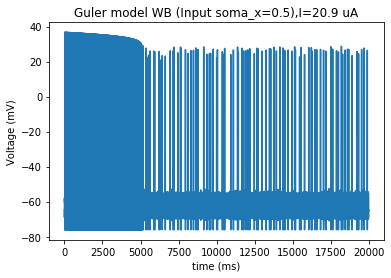

In [18]:
plt.plot(t_vec, v_vec)
plt.xlabel('time (ms)')
plt.title('Guler model WB (Input soma_x=0.5),I=20.9 uA')
plt.ylabel('Voltage (mV)')
#plt.show()
#plt.savefig("soma/volt_100.png",bbox_inches = "tight")

(0, 100)

/Users/giulia/opt/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


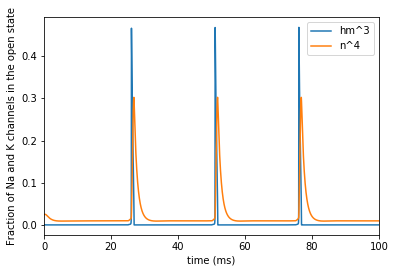

In [31]:
plt.plot(t_vec, m_vec * m_vec * m_vec * h_vec, t_vec, n_vec * n_vec * n_vec * n_vec)
plt.xlabel('time (ms)')
plt.ylabel('Fraction of Na and K channels in the open state')
plt.legend(('hm^3', 'n^4'))
plt.xlim(0,100)
#plt.show()
#plt.savefig("soma/fract_100.png",bbox_inches = "tight")

/Users/giulia/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  if __name__ == '__main__':


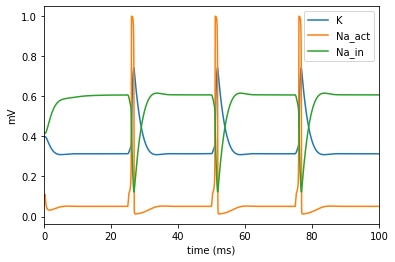

In [24]:
plt.plot(t_vec, n_vec)
plt.plot(t_vec, m_vec)
plt.plot(t_vec, h_vec)
plt.xlabel('time (ms)')
plt.ylabel('mV')
plt.legend(('K', 'Na_act', 'Na_in'))
plt.xlim(0,100)
#plt.show()
plt.savefig("soma/chann_100.png",bbox_inches = "tight")

### Latency

In [25]:
def Latency(v_vec,t_vec,n,freq):
    v=np.array(v_vec).tolist()
    t=np.array(t_vec)
    t1=t.tolist()
    t_out=[]
    lat=[]
    t_lat=[]
    for i in range(0,n):
        indx1=np.where(t > i*freq)[0][0]
        indx2=np.where(t <(i*freq+freq))[0][-1]
        aux=max(v[indx1:indx2])
        if(aux>10):
            aux_t=int(t1[v.index(aux)]/freq)*freq
            lat.append(t1[v.index(aux)]-aux_t)
            t_lat.append(aux_t/1000)
    return lat,t_lat

In [281]:
%%time
lat_L_1000,t_lat_L_1000=Latency(v_vec,t_vec,n,freq)

CPU times: user 7.78 s, sys: 1.11 s, total: 8.89 s
Wall time: 8.69 s


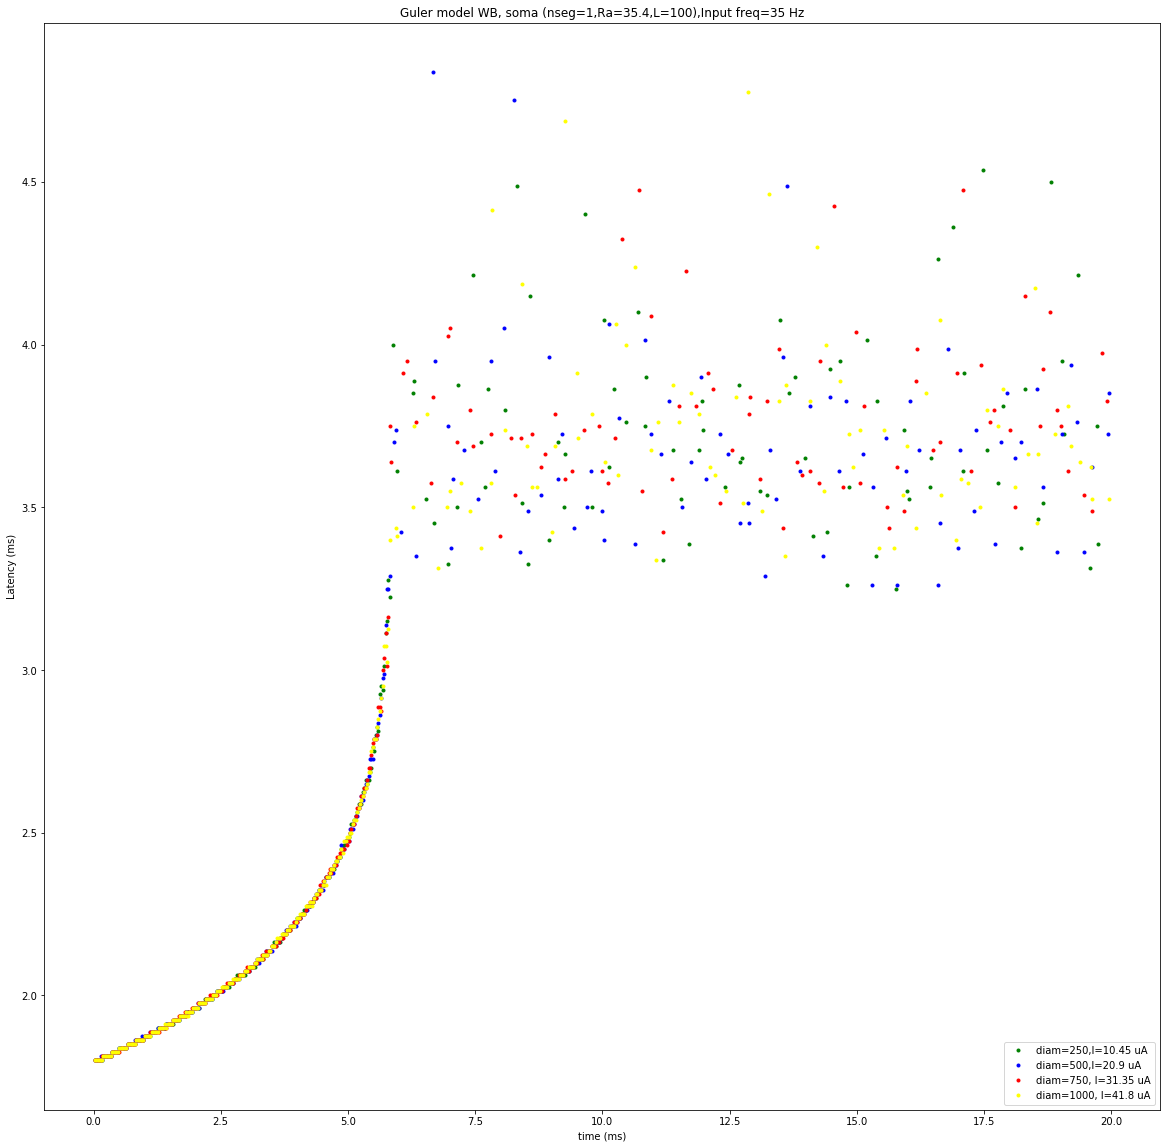

In [282]:
plt.figure(figsize=(20,20))

plt.plot(t_lat_L_250, lat_L_250, '.', color='green', label="diam=250,I=10.45 uA")
plt.plot(t_lat_L_100, lat_L_100, '.', color='blue', label="diam=500,I=20.9 uA")
plt.plot(t_lat_L_750, lat_L_750, '.', color='red', label="diam=750, I=31.35 uA")
plt.plot(t_lat_L_1000, lat_L_1000, '.', color='yellow', label="diam=1000, I=41.8 uA")
#plt.plot(t_lat_60, lat_60, '.', color='purple', label="15 Hz")
#plt.plot(t_lat_100, lat_100, '.', color='pink', label="10 Hz")
#plt.plot(t_lat_200, lat_200, '.', color='lightblue', label="5 Hz")
#plt.plot(t_lat_1000, lat_1000, '.', color='black', label="1 Hz")

plt.xlabel('time (ms)')
plt.ylabel('Latency (ms)')
plt.title('Guler model WB, soma (nseg=1,Ra=35.4,L=100),Input freq=35 Hz')
plt.legend(loc="lower right")
#plt.ylim(top=6)
#plt.savefig("soma/Latency_comp_diam.png")

### Clusters

In [43]:
lat_0_25,t_lat_0_25=Latency(v_vec,t_vec,n,freq)

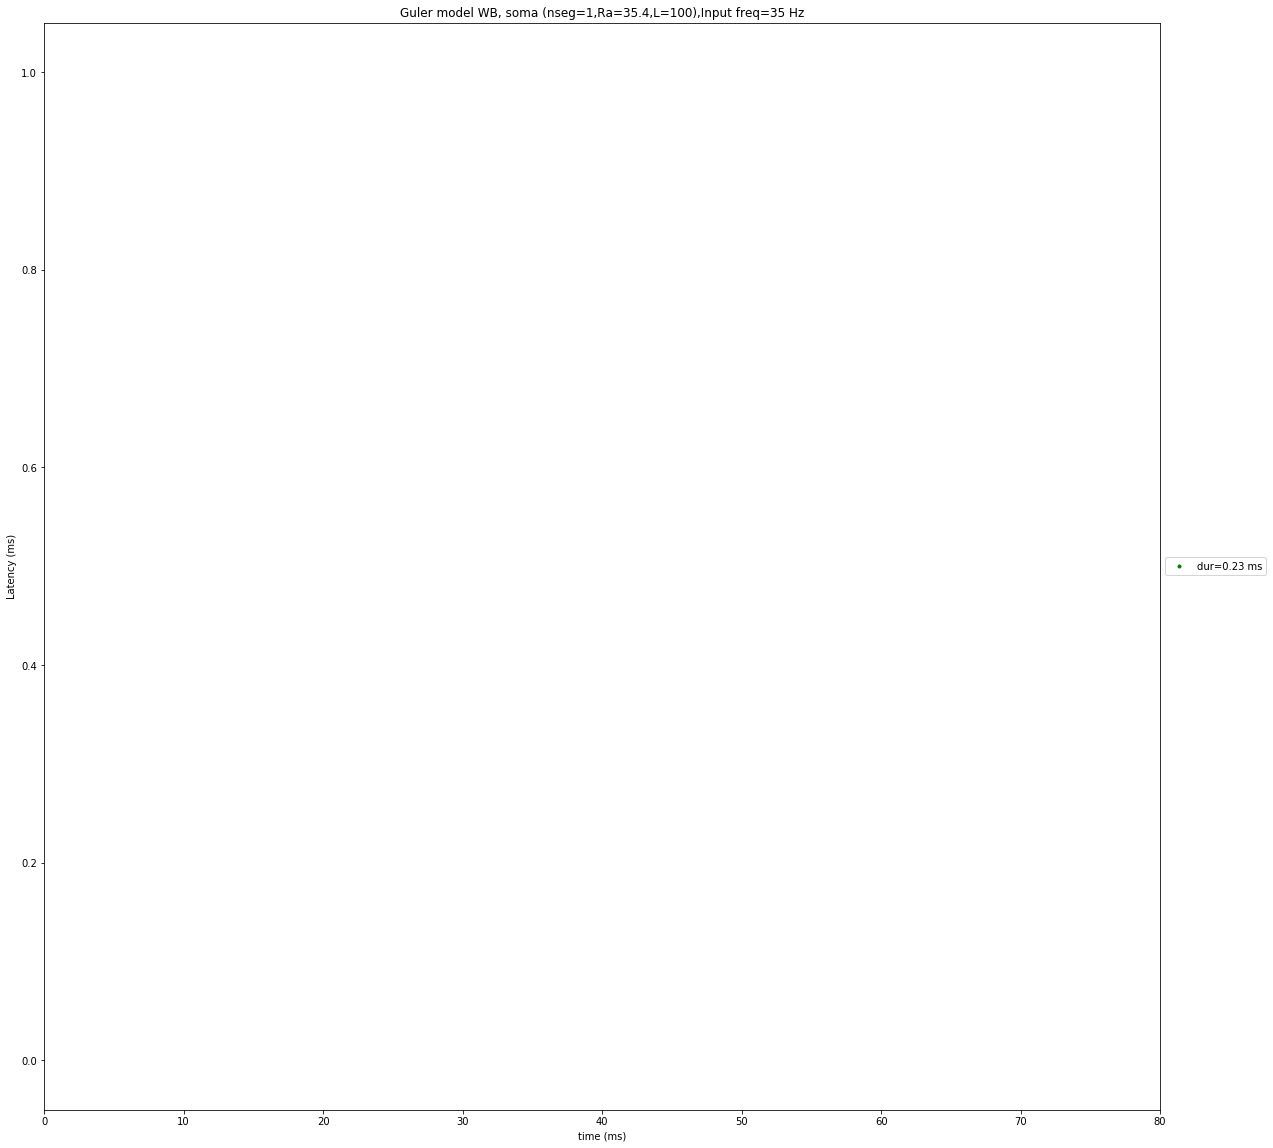

In [44]:
plt.figure(figsize=(20,20))
plt.plot(t_lat_0_25, lat_0_25, '.', color='green', label="dur=0.23 ms")
#plt.plot(t_lat_0_26, lat_0_26, '.', color='blue', label="dur=0.26 ms")
#plt.plot(t_lat_0_28, lat_0_28, '.', color='red', label="dur=0.28 ms")
#plt.plot(t_lat_0_30, lat_0_30, '.', color='yellow', label="dur=0.30 ms")
#plt.plot(t_lat_0_37, lat_0_37, '.', color='pink', label="dur=0.35 ms")
#plt.plot(t_lat_0_40, lat_0_40, '.', color='purple', label="dur=0.40 ms")
#plt.plot(t_lat_0_5, lat_0_5, '.', color='red', label="dur=0.5 ms")
#plt.plot(t_lat_200, lat_200, '.', color='lightblue', label="5 Hz")
#plt.plot(t_lat_1000, lat_1000, '.', color='black', label="1 Hz")
plt.xlim(0,80)
plt.xlabel('time (ms)')
plt.ylabel('Latency (ms)')
plt.title('Guler model WB, soma (nseg=1,Ra=35.4,L=100),Input freq=35 Hz')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Statistics

##### ISI

In [9]:
import seaborn as sns

In [6]:
def Spike_time(v_vec,t_vec,n,freq):
    v=np.array(v_vec).tolist()
    t=np.array(t_vec)
    t1=t.tolist()
    t_out=[]
    for i in range(0,n):
        indx1=np.where(t > i*freq)[0][0]
        indx2=np.where(t <(i*freq+freq))[0][-1]
        aux=max(v[indx1:indx2])
        if(aux>10):
            t_out.append(t1[v.index(aux)])
    return t_out

def ISI(v_vec,t_vec,n,freq):
    t_spike=Spike_time(v_vec,t_vec,n,freq)
    isi=[]
    for i in range(len(t_spike)-1,0,-1):
        isi.append(t_spike[i]-t_spike[i-1])
    isi.reverse()
    return isi

In [35]:
isi_33=ISI(v_vec,t_vec,n,freq)

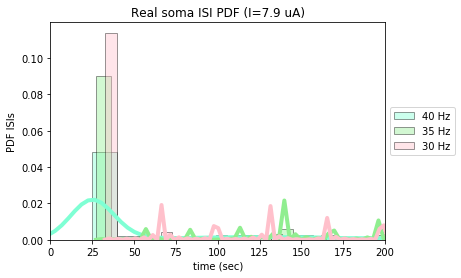

In [37]:
sns.distplot(isi_25, hist=True, kde=True, color = 'aquamarine', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},label = "25 Hz")
sns.distplot(isi_28, hist=True, kde=True, color = 'lightgreen', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},label = "28 Hz")
sns.distplot(isi_33, hist=True, kde=True, color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},label = "33.3 Hz")

plt.legend(["40 Hz","35 Hz","30 Hz"],loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Real soma ISI PDF (I=7.9 uA)")
#plt.title("M stochastic model (I=7.9 uA, white noise input)")
plt.ylabel("PDF ISIs")
plt.xlabel("time (sec)")
plt.xlim([0,200])
plt.savefig("soma/PDF.png",bbox_inches = "tight")

##### Nspike

In [11]:
def Count(v_vec):
    count=0
    #Npeak=[]
    Na=0
    for i in range(0,len(v_vec)):
        #Npeak.append(0)
        if(count==0 and v_vec[i]>=-10.):
            count=1
            Na+=1;
            #Npeak.append(1)
        if(count==1 and v_vec[i]<-10.):
            count=0
            #Npeak.append(0)
    return Na


def Nspike(v_vec,t_vec,n,freq):
    v=np.array(v_vec).tolist()
    t=np.array(t_vec)
    t1=t.tolist()
    N_out=[]
    for i in range(0,n):
        indx1=np.where(t > i*freq)[0][0]
        indx2=np.where(t <(i*freq+freq))[0][-1]
        aux=v[indx1:indx2]
        N_out.append(Count(aux))
    t_out=[i for i in range(0,n)]
    return N_out,t_out

In [12]:
N_25,t_25=Nspike(v_vec,t_vec,20,1000)

In [ ]:
#N_33[7:]=[i+10 for i in N_33[7:]]
#N_28[6:]=[i+10 for i in N_28[6:]]
N_25[6:]=[i+10 for i in N_25[6:]]

In [ ]:
plt.plot(t_25,N_25,color='aquamarine')
#plt.plot(t_28,N_28,color='lightgreen')
#plt.plot(t_33,N_33,color='pink')
#plt.plot(N_Spike_40.s, N_Spike_40.N,color='yellow')
#plt.axvline(x=20, color='k', linestyle='--')
plt.xticks(rotation=45)
plt.legend(["40 Hz","35 Hz","30 Hz"])
plt.title("Real soma (I=7.9 uA)")
#plt.title("Guler stochastic model (corrected variance,I=7.9 uA)")
plt.ylabel("Number Spikes")
plt.xlabel("time (sec)")
#plt.savefig("soma/Nspike.png",bbox_inches = "tight")
plt.show()